In [1]:
from pysdmx.io import get_datasets
import utils
import json

with open('sub_codelists.json', 'r') as f:
    sub_codelists = json.load(f)
    

In [2]:
nrg_bal_sel = sub_codelists['nrg_bal_consumption_basic'] + sub_codelists['nrg_bal_consumption_other_full']
nrg_bal_sel.remove('FC_OTH_E')

nrg_bal_siec_basic_constraints = {
    'freq': 'A',
    'nrg_bal': nrg_bal_sel,
    'siec': sub_codelists['nrg_bal_siec_basic'],
    'unit': 'GWH',
    'geo': sub_codelists['all_countries'],
}

data_selection = utils.build_data_selection(nrg_bal_siec_basic_constraints)

data_url = utils.get_data_url('nrg_bal_s', data_selection=data_selection, start_period=2000)
metadata_url = utils.get_metadata_url('nrg_bal_s')
print(data_url)

nrg_bal_siec_basic = get_datasets(data_url, metadata_url, validate=False)[0]
nrg_bal_siec_basic.data.TIME_PERIOD = nrg_bal_siec_basic.data.TIME_PERIOD.astype(int)
nrg_bal_siec_basic.data.OBS_VALUE = nrg_bal_siec_basic.data.OBS_VALUE.astype(float)
display(nrg_bal_siec_basic.data)

https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/nrg_bal_s/A.FC_IND_E+FC_TRA_E+FC_OTH_AF_E+FC_OTH_CP_E+FC_OTH_FISH_E+FC_OTH_HH_E+FC_OTH_NSP_E.C0000X0350-0370+C0350-0370+P1000+S2000+G3000+O4000XBIO+RA000+W6100_6220+N900H+E7000+H8000.GWH.BE+BG+CZ+DK+DE+EE+IE+EL+ES+FR+HR+IT+CY+LV+LT+LU+HU+MT+NL+AT+PL+PT+RO+SI+SK+FI+SE+IS+NO+UK+BA+ME+MD+MK+GE+AL+RS+TR+UA+XK?format=SDMX-CSV&startPeriod=2000


c:\Users\aolle\.virtualenvs\sdmx_io_data_science-32hfwsck\Lib\site-packages\pysdmx\io\csv\sdmx10\reader\__init__.py:49: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_csv = pd.read_csv(StringIO(input_str))


nrg_bal             siec geo  TIME_PERIOD  OBS_VALUE OBS_FLAG
0      FC_IND_E  C0000X0350-0370  AL         2000    103.898      nan
1      FC_IND_E  C0000X0350-0370  AL         2001    109.367      nan
2      FC_IND_E  C0000X0350-0370  AL         2002     65.620      nan
3      FC_IND_E  C0000X0350-0370  AL         2003    101.164      nan
4      FC_IND_E  C0000X0350-0370  AL         2004    117.569      nan
...         ...              ...  ..          ...        ...      ...
69757  FC_TRA_E       W6100_6220  XK         2018      0.000      nan
69758  FC_TRA_E       W6100_6220  XK         2019      0.000      nan
69759  FC_TRA_E       W6100_6220  XK         2020      0.000      nan
69760  FC_TRA_E       W6100_6220  XK         2021      0.000      nan
69761  FC_TRA_E       W6100_6220  XK         2022      0.000      nan

[69762 rows x 6 columns]

In [3]:
demo_pjan_constraints={
    'freq': 'A',
    'unit': 'NR',
    'age': 'TOTAL',
    'sex': 'T',
    'geo': sub_codelists['all_countries'],

    }

data_selection = utils.build_data_selection(demo_pjan_constraints)

data_url = utils.get_data_url('demo_pjan', data_selection=data_selection, start_period=2001)
metadata_url = utils.get_metadata_url('demo_pjan')
demo_pjan_total = utils.get_datasets(data_url, metadata_url, validate=False)[0]
demo_pjan_total.data.OBS_VALUE = demo_pjan_total.data.OBS_VALUE.astype(float)

# We have to subtract 1 year to the TIME_PERIOD to match the nrg_bal_s_total data
demo_pjan_total.data.TIME_PERIOD = demo_pjan_total.data.TIME_PERIOD.astype(int)
demo_pjan_total.data.TIME_PERIOD  = demo_pjan_total.data.TIME_PERIOD  - 1
display(demo_pjan_total.data)


geo  TIME_PERIOD  OBS_VALUE OBS_FLAG
0    AL         2000  3063318.0      nan
1    AL         2001  3057018.0      nan
2    AL         2002  3044993.0      nan
3    AL         2003  3034231.0      nan
4    AL         2004  3019634.0      nan
..   ..          ...        ...      ...
893  XK         2017  1798506.0      nan
894  XK         2018  1795666.0      nan
895  XK         2019  1782115.0      nan
896  XK         2020  1798186.0      nan
897  XK         2021  1773971.0      nan

[898 rows x 4 columns]

In [4]:
utils.add_labels(nrg_bal_siec_basic, 'nrg_bal')
utils.add_labels(nrg_bal_siec_basic, 'siec')

PandasDataset(structure=Schema(context='datastructure', agency='ESTAT', id='NRG_BAL_S', components=[Component(id='freq', required=True, role=<Role.DIMENSION: 'D'>, concept=Concept(id='freq', uri=None, urn='urn:sdmx:org.sdmx.infomodel.conceptscheme.Concept=ESTAT:NRG_BAL_S(39.0).freq', name='Time frequency', description=None, dtype=None, facets=None, codes=Codelist(id='FREQ', uri=None, urn='urn:sdmx:org.sdmx.infomodel.codelist.Codelist=ESTAT:FREQ(3.5)', name='Time frequency', description='This code list contains the periodicity that refers to the frequency.', version='3.5', valid_from=None, valid_to=None, is_final=True, is_external_reference=False, service_url=None, structure_url=None, agency='ESTAT', items=[Code(id='P', uri=None, urn='urn:sdmx:org.sdmx.infomodel.codelist.Code=ESTAT:FREQ(3.5).P', name='Pluri-annual', description=None, valid_from=None, valid_to=None, annotations=[Annotation(id=None, title='Y', text='Standard code, follows Eurostat Standard Code List Guidelines', url=None,

In [5]:
#kWh per capita

full_dataset = nrg_bal_siec_basic.data.merge(demo_pjan_total.data, on=['TIME_PERIOD', 'geo'])
full_dataset.rename(columns={'OBS_VALUE_x': 'energy_consumption_gwh', 'OBS_VALUE_y': 'population'}, inplace=True)
full_dataset['energy_consumption_PC_kwh'] = full_dataset['energy_consumption_gwh'] / full_dataset['population'] * 1000000

<Axes: ylabel='TIME_PERIOD'>

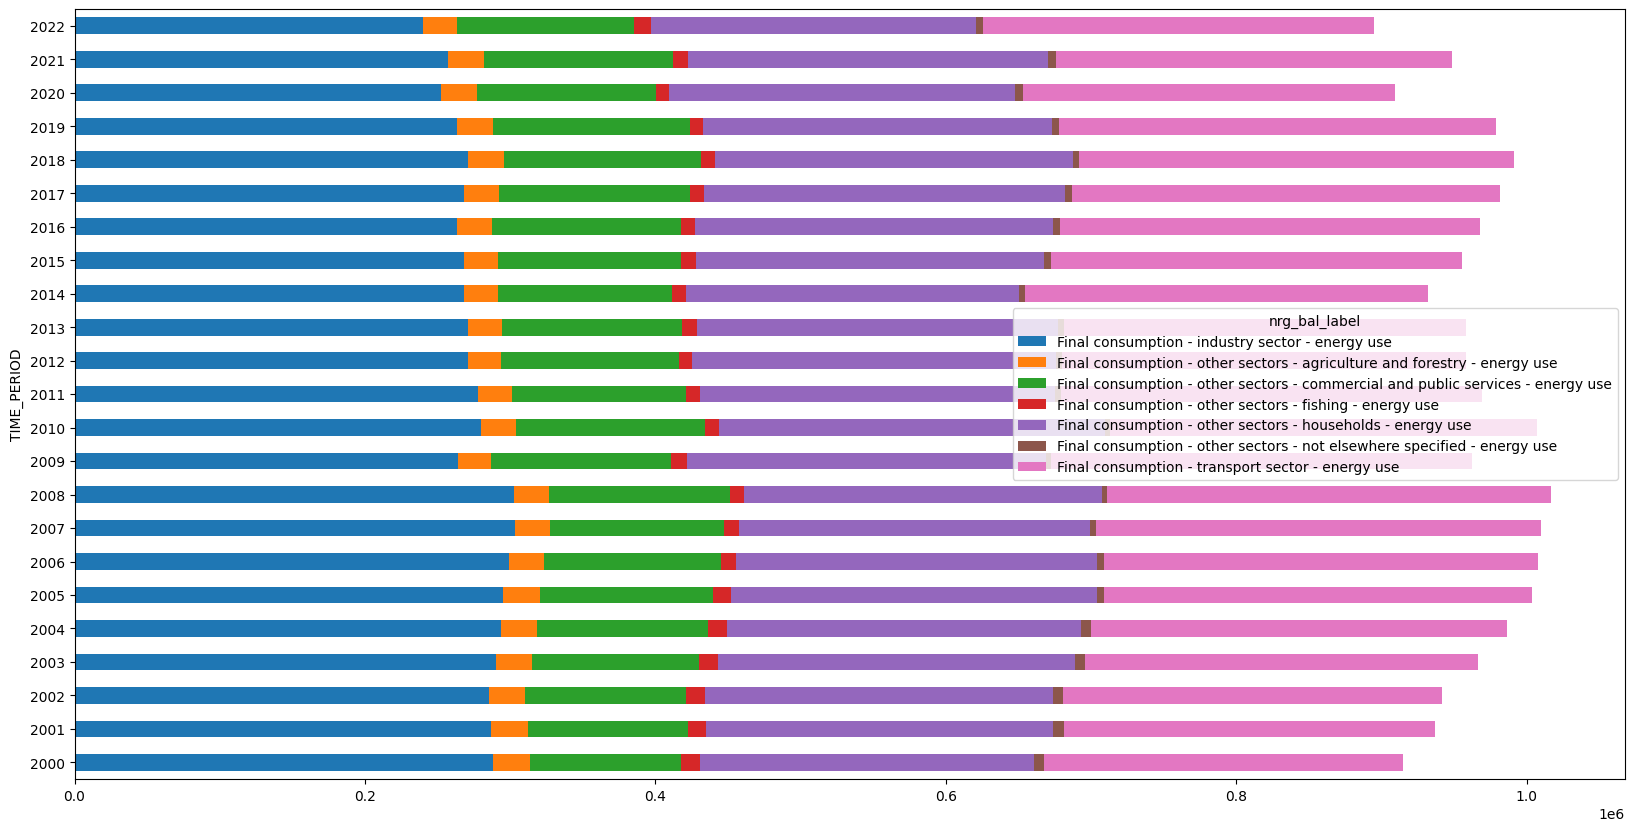

In [6]:
df = full_dataset.groupby(['TIME_PERIOD', 'nrg_bal_label'])['energy_consumption_PC_kwh'].sum()
df.unstack().plot(kind='barh', stacked=True, figsize=(20, 10))

<Axes: xlabel='TIME_PERIOD,geo'>

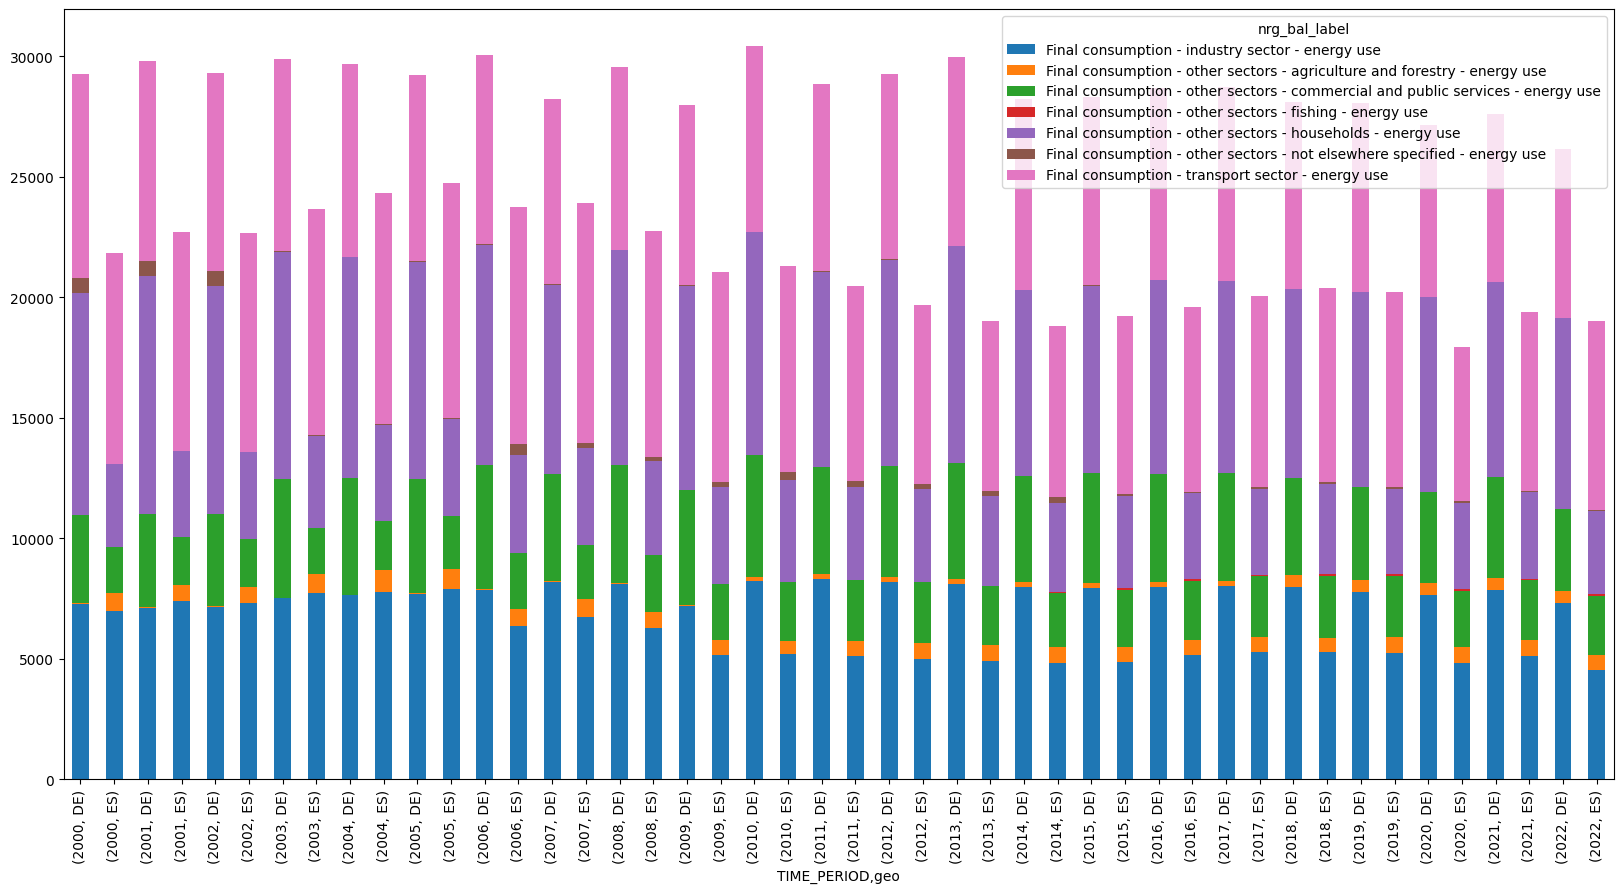

In [7]:
df = full_dataset[full_dataset['geo'].isin(['ES', 'DE'])]
df = df.groupby(['TIME_PERIOD', 'nrg_bal_label', 'geo'])['energy_consumption_PC_kwh'].sum()
df =df.unstack(level='nrg_bal_label')
df.plot(kind='bar', figsize=(20, 10), stacked=True)




<Axes: xlabel='geo'>

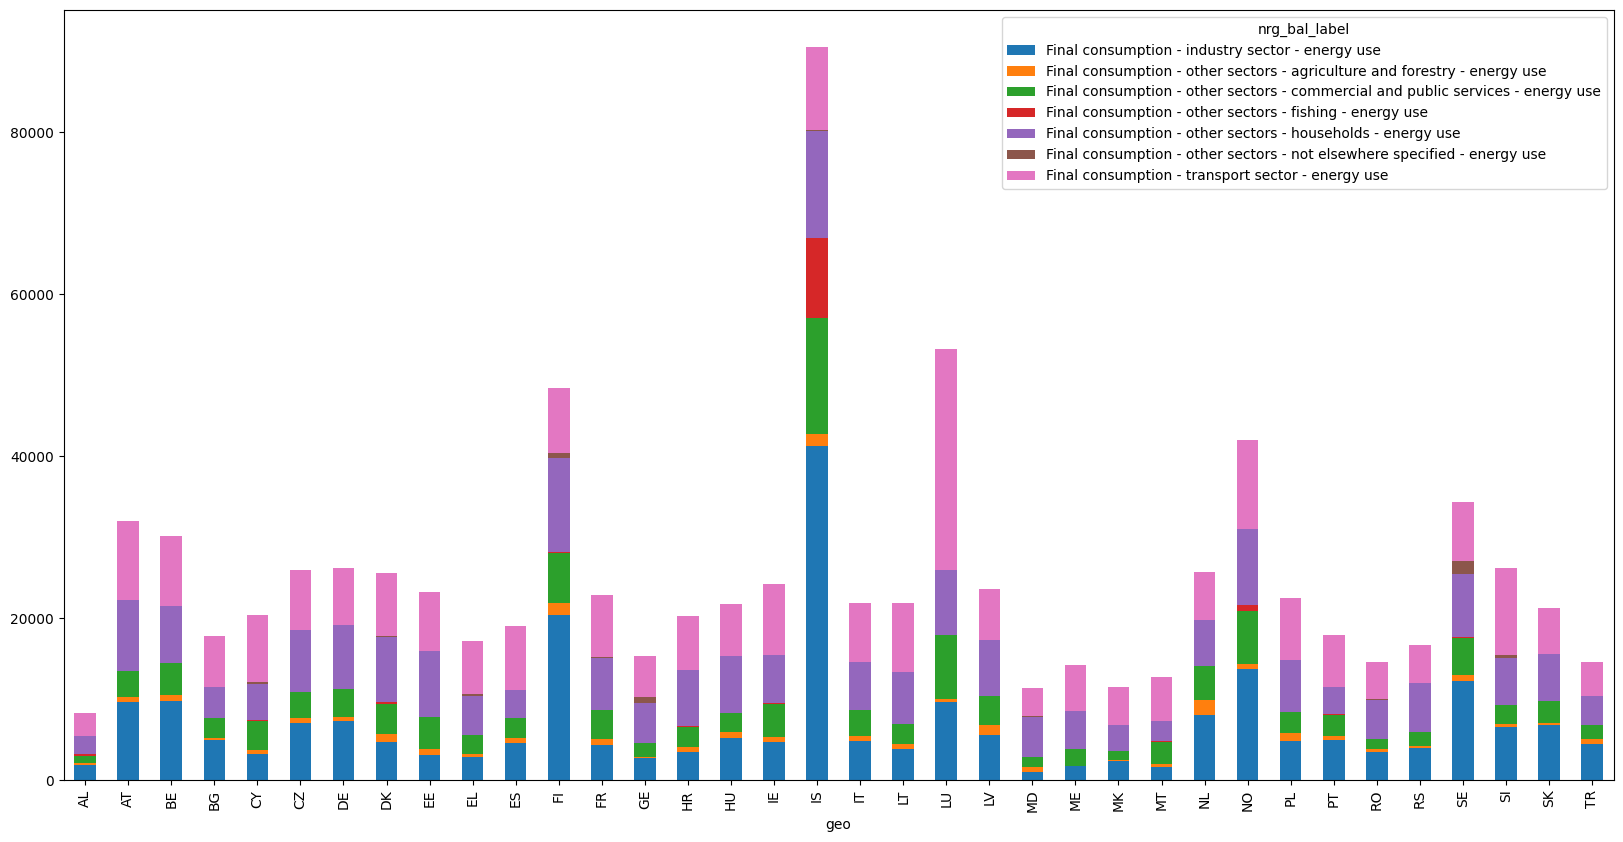

In [8]:
#Table with all
df = full_dataset[full_dataset['TIME_PERIOD'] == 2022]

df = df.groupby(['nrg_bal_label', 'geo'])['energy_consumption_PC_kwh'].sum()
df =df.unstack(level='nrg_bal_label')
df.plot(kind='bar', figsize=(20, 10), stacked=True)



In [9]:
#Table with all
df = full_dataset[(full_dataset['TIME_PERIOD'] == 2022) & (full_dataset['nrg_bal'] == 'FC_OTH_HH_E')]

df = df.groupby(['geo'])['energy_consumption_PC_kwh'].sum()
display(df.sort_values(ascending=False))
# df.plot(kind='bar', figsize=(20, 10), )



geo
IS    13293.237019
FI    11709.079668
NO     9396.706203
AT     8801.628421
EE     8207.087132
LU     7988.899970
DK     7921.089448
DE     7918.159477
SE     7805.909506
CZ     7688.256203
HU     7052.319416
BE     6982.254822
HR     6904.982583
LV     6883.147071
PL     6479.767880
FR     6366.228528
LT     6342.001954
RS     6000.296332
IE     5977.873978
IT     5922.359723
SI     5797.668084
SK     5755.265997
NL     5600.664825
MD     4962.688806
GE     4904.396983
EL     4820.678584
RO     4818.553187
ME     4693.371926
CY     4554.268975
BG     3855.310025
TR     3614.395575
ES     3436.423925
PT     3279.932880
MK     3129.256801
MT     2467.773328
AL     2208.470971
Name: energy_consumption_PC_kwh, dtype: float64

In [31]:
import plotly.graph_objects as go

df = full_dataset[(full_dataset['TIME_PERIOD'] == 2022)]


sources = df['siec_label'].unique()
targets = df['nrg_bal_label'].unique()


labels = []
source = []
target = []
value = []

index = 0
index_dict = {}

for s in sources:
    labels.append(s)
    index_dict[s] = index
    index += 1

    for t in targets:
        if t not in index_dict:
            labels.append(t)
            index_dict[t] = index
            index += 1
        source.append(index_dict[s])
        target.append(index_dict[t])
        value.append(df[(df['siec_label'] == s) & (df['nrg_bal_label'] == t)]['energy_consumption_PC_kwh'].sum())
        
    


fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = "blue"
    ),
    link = dict(
      source = source,
      target = target,
      value = value
  ))])

fig.update_layout(title_text="Source of energy by sectors", font_size=10)
fig.show()